In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [4]:
#Import dữ liệu
df = pd.read_csv('BankChurners.csv')

In [5]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [6]:
#Xem kích thước của tập dữ liệu
df.shape

(10127, 23)

In [7]:
#Xóa các cột không có ý nghĩa
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

In [8]:
df = df.drop(['CLIENTNUM'], axis = 1)

In [9]:
#Xem thông tin kiểu dữ liệu của các cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [10]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [11]:
#Tìm dữ liệu null trong tệp data
f_null = df.isnull().sum()
f_null

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

=> Không có dữ liệu null trong data

In [12]:
#Tìm dữ liệu NaN
f_nan= df.isna().sum()
f_nan

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

=> Không có dữ liệu NaN

### TRỰC QUAN DỮ LIỆU

## Attrition_Flag

<Axes: xlabel='Attrition_Flag'>

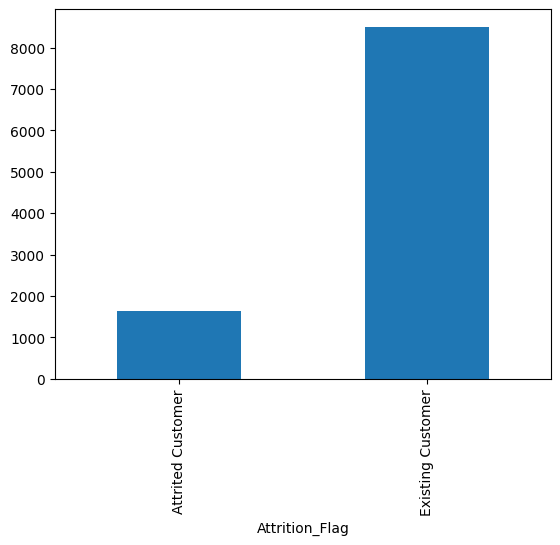

In [11]:
df.groupby(['Attrition_Flag'])['Attrition_Flag'].count().plot.bar()

In [12]:
len(df[df['Attrition_Flag'] == 'Attrited Customer']) / len(df)

0.1606596227905599

Attrited Customer chiếm 16% nên tệp dữ liệu bị mất cân bằng nghiêm trọng

Chuyển đổi 2 tên thuộc trên về 2 giá trị 0 và 1. Với Attrited Customer = 0 và Existing Customer = 1

<Axes: xlabel='Attrition_Flag'>

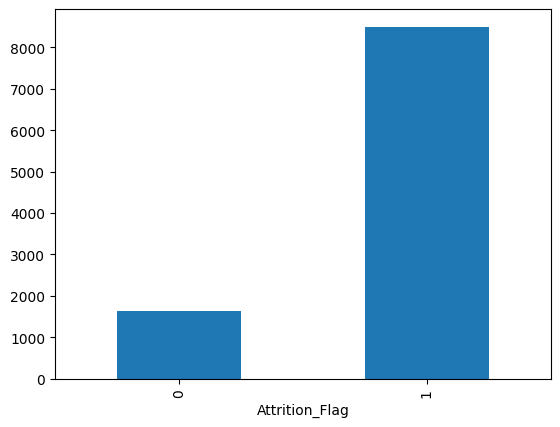

In [13]:
df.loc[df['Attrition_Flag'] == 'Attrited Customer', 'Attrition_Flag'] = 0
df.loc[df['Attrition_Flag'] == 'Existing Customer', 'Attrition_Flag'] = 1
df.groupby(['Attrition_Flag'])['Attrition_Flag'].count().plot.bar()

## Customer_Age

<Axes: xlabel='Customer_Age'>

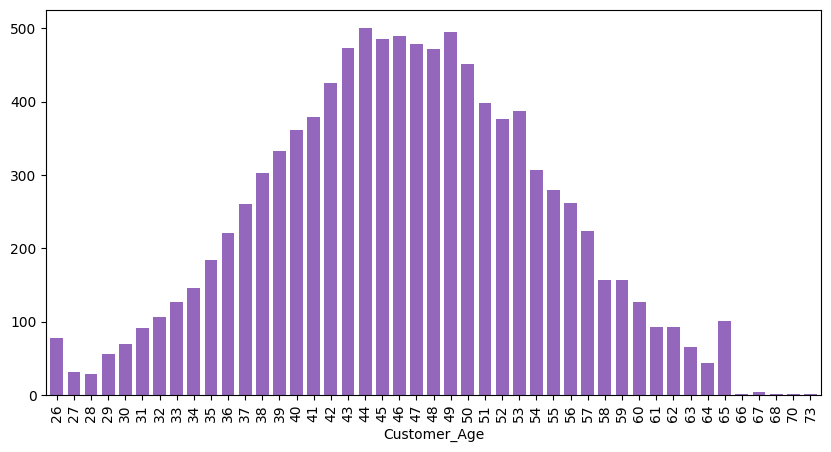

In [14]:
plt.figure(figsize = (10, 5))
data_to_plot = df.groupby(['Customer_Age'])['Customer_Age'].count()
data_to_plot.plot.bar(width = 0.75, color = 'C4')

Chia thuộc tính Customer_Age vào các nhóm

In [14]:
for df in [df]:
    df['Customer_Age'] = df['Customer_Age'].astype(int)
    df.loc[(df['Customer_Age'] >=26) & (df['Customer_Age'] <= 40), 'Customer_Age'] =1
    df.loc[(df['Customer_Age'] >40) & (df['Customer_Age'] <= 46), 'Customer_Age'] =2
    df.loc[(df['Customer_Age'] >46) & (df['Customer_Age'] <= 50), 'Customer_Age'] =3
    df.loc[(df['Customer_Age'] >50) & (df['Customer_Age'] <= 55), 'Customer_Age'] =4
    df.loc[(df['Customer_Age'] >55) & (df['Customer_Age'] <= 75), 'Customer_Age'] =5

<Axes: xlabel='Customer_Age'>

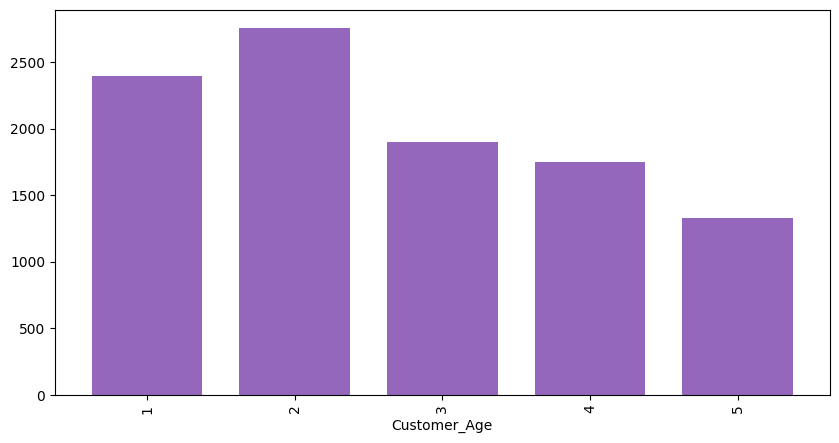

In [16]:
plt.figure(figsize = (10, 5))
data_to_plot = df.groupby(['Customer_Age'])['Customer_Age'].count()
data_to_plot.plot.bar(width = 0.75, color = 'C4')

## Gender

<Axes: xlabel='Gender'>

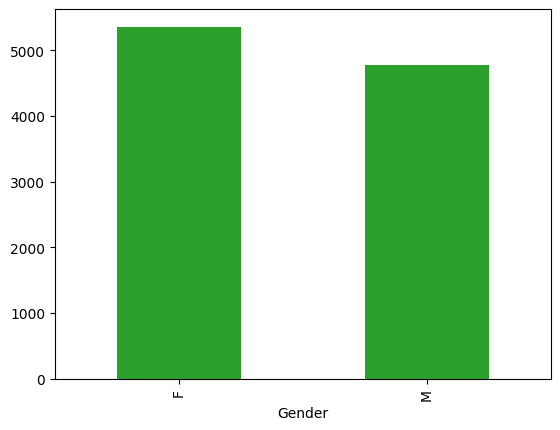

In [17]:
df.groupby(['Gender'])['Gender'].count().plot.bar(color = 'C2')

## Dependent_count

<Axes: xlabel='Dependent_count'>

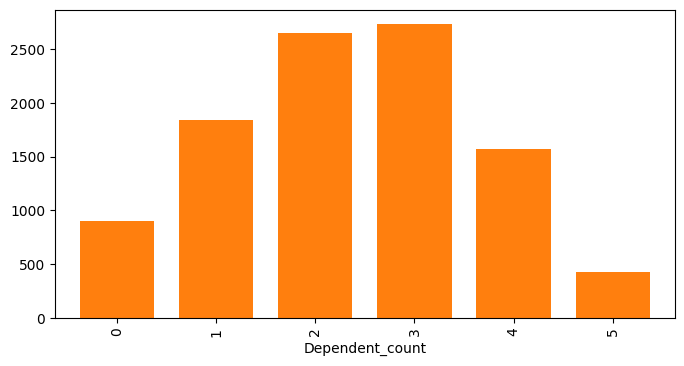

In [18]:
plt.figure(figsize = (8, 4))
data_to_plot = df.groupby(['Dependent_count'])['Dependent_count'].count()
data_to_plot.plot.bar(width = 0.75, color = 'C11')

## Education_Level, Marital_Status, Income_Category

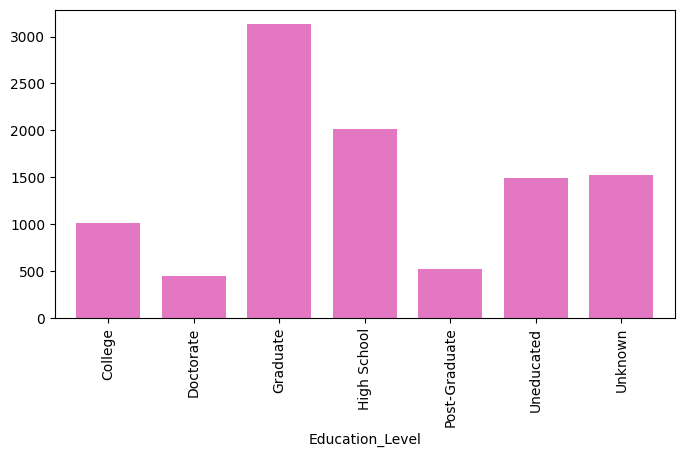

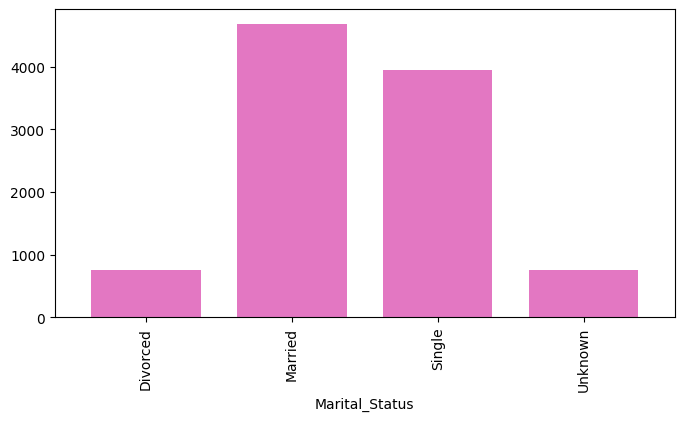

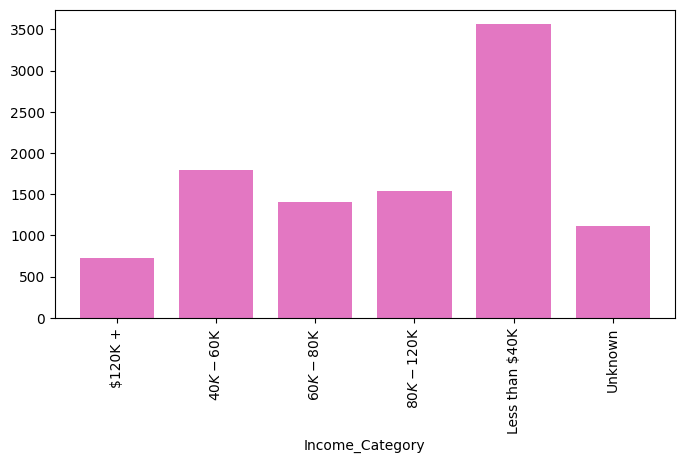

In [19]:
for column in ['Education_Level', 'Marital_Status', 'Income_Category']:
    plt.figure(figsize = (8, 4))
    data_to_plot = df.groupby([column])[column].count()
    data_to_plot.plot.bar(width = 0.75, color = 'C6')

## Card_Category

<Axes: xlabel='Card_Category'>

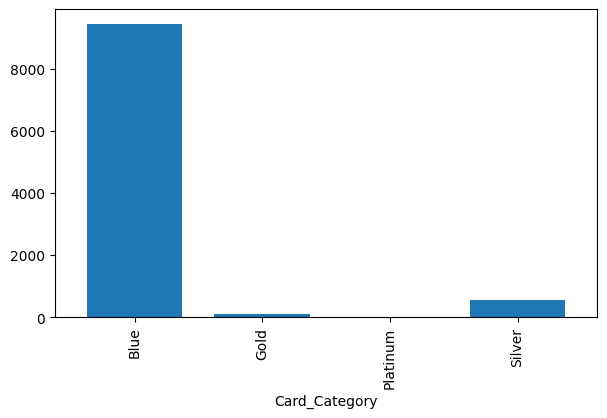

In [20]:
plt.figure(figsize = (7, 4))
data_to_plot = df.groupby(['Card_Category'])['Card_Category'].count()
data_to_plot.plot.bar(width = 0.75)

Nhận thấy tỉ lệ Blue chiếm vượt trội so với các thuộc tính khác. Vậy nên ta chia Card_Category thành 2 thuộc tính Blue và Not blue

<Axes: xlabel='Card_Category'>

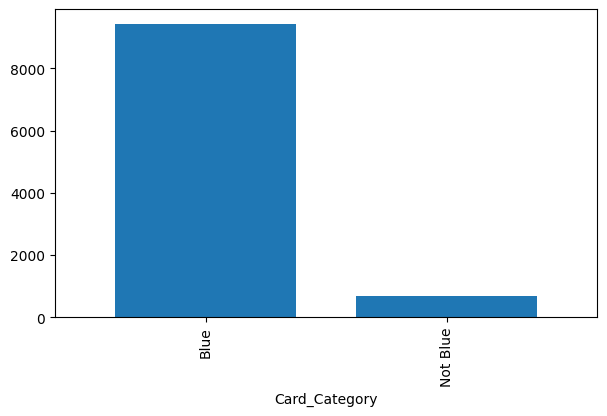

In [15]:
df.loc[df['Card_Category'] != 'Blue', 'Card_Category'] = 'Not Blue'
plt.figure(figsize = (7, 4))
data_to_plot = df.groupby(['Card_Category'])['Card_Category'].count()
data_to_plot.plot.bar(width = 0.75)

## Months_on_book

<Axes: xlabel='Months_on_book'>

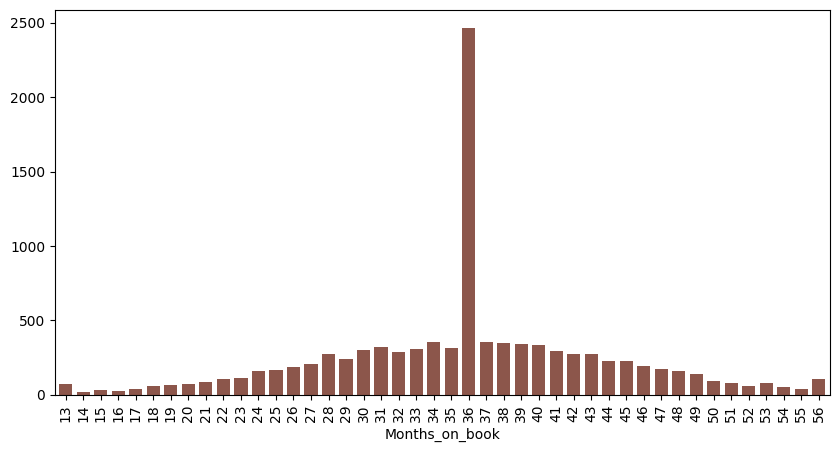

In [22]:
plt.figure(figsize = (10, 5))
data_to_plot = df.groupby(['Months_on_book'])['Months_on_book'].count()
data_to_plot.plot.bar(width = 0.75, color = 'C5')

In [16]:
for df in [df]:
    df['Months_on_book'] = df['Months_on_book'].astype(int)
    df.loc[(df['Months_on_book'] >=13) & (df['Months_on_book'] <= 34), 'Months_on_book'] =1
    df.loc[(df['Months_on_book'] >34) & (df['Months_on_book'] <= 36), 'Months_on_book'] =2
    df.loc[(df['Months_on_book'] >36) & (df['Months_on_book'] <= 56), 'Months_on_book'] =3

<Axes: xlabel='Months_on_book'>

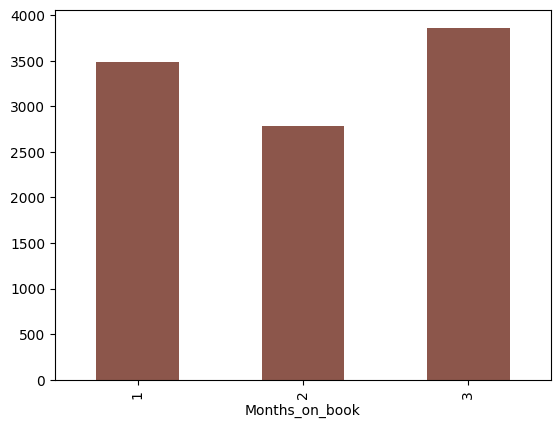

In [24]:
data_to_plot = df.groupby(['Months_on_book'])['Months_on_book'].count()
data_to_plot.plot.bar(width = 0.5, color = 'C5')

## Total_Relationship_Count

<Axes: xlabel='Total_Relationship_Count'>

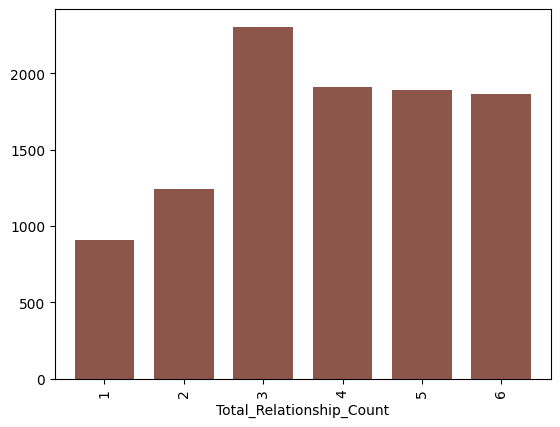

In [25]:
data_to_plot = df.groupby(['Total_Relationship_Count'])['Total_Relationship_Count'].count()
data_to_plot.plot.bar(width = 0.75, color = 'C5')

## Months_Inactive_12_mon

<Axes: xlabel='Months_Inactive_12_mon'>

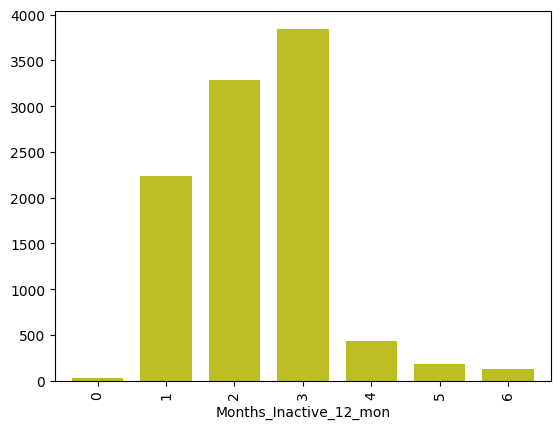

In [26]:
data_to_plot = df.groupby(['Months_Inactive_12_mon'])['Months_Inactive_12_mon'].count()
data_to_plot.plot.bar(width = 0.75, color = 'C8')

## Contacts_Count_12_mon

<Axes: xlabel='Contacts_Count_12_mon'>

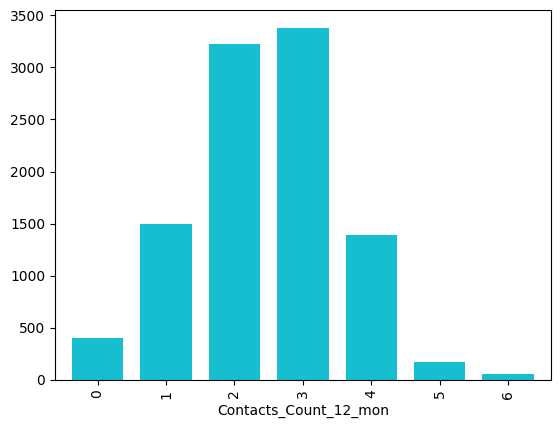

In [27]:
data_to_plot = df.groupby(['Contacts_Count_12_mon'])['Contacts_Count_12_mon'].count()
data_to_plot.plot.bar(width = 0.75, color = 'C9')

## Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio

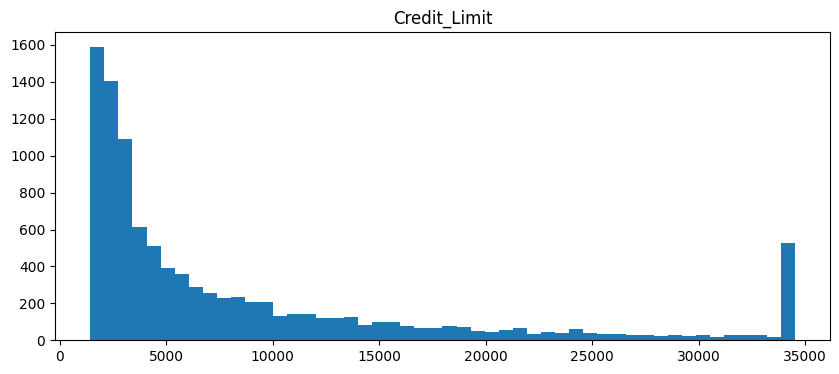

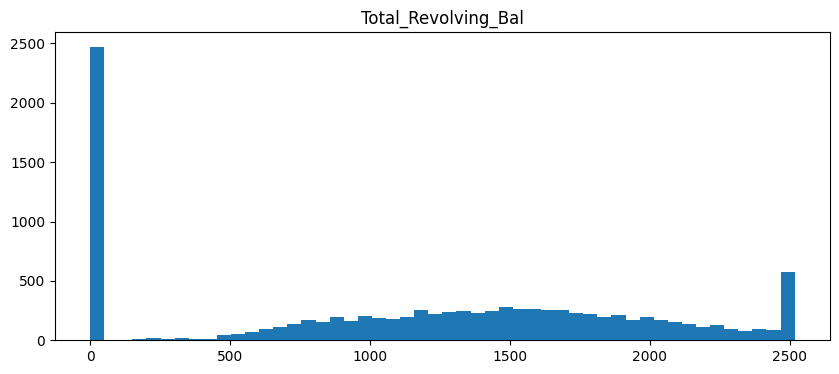

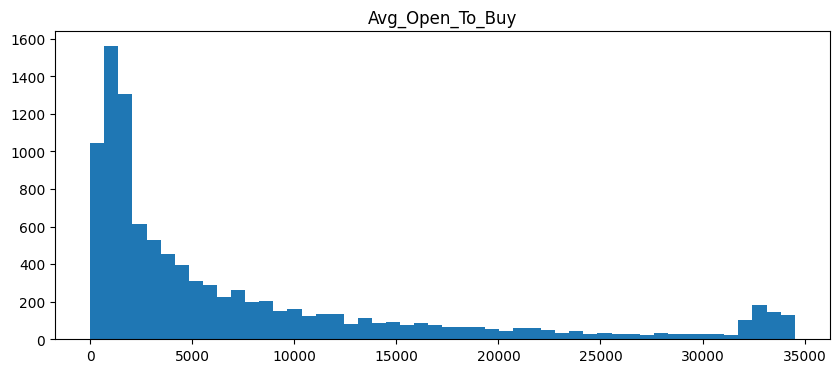

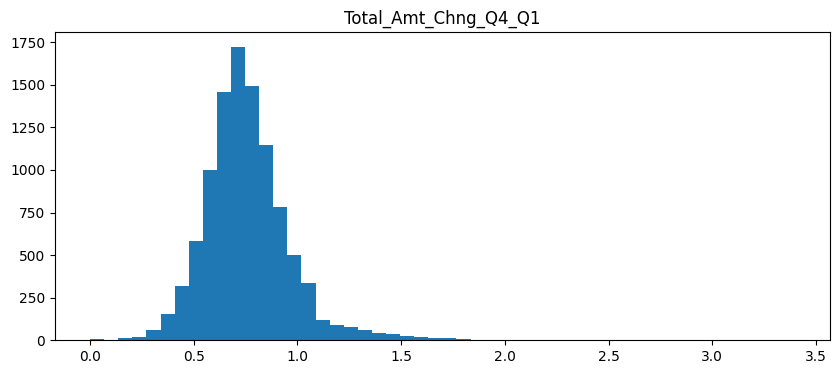

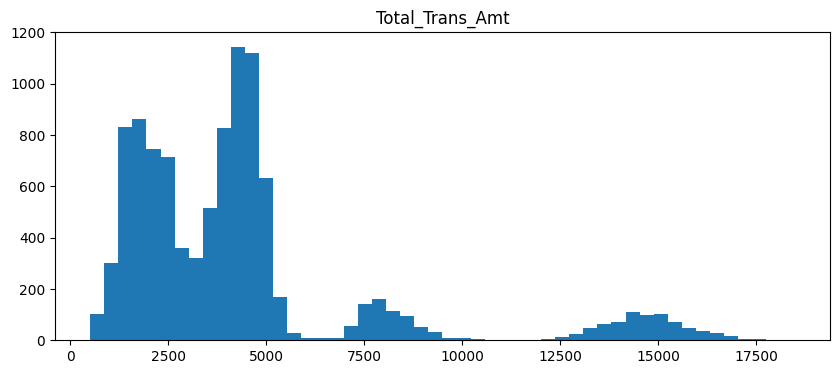

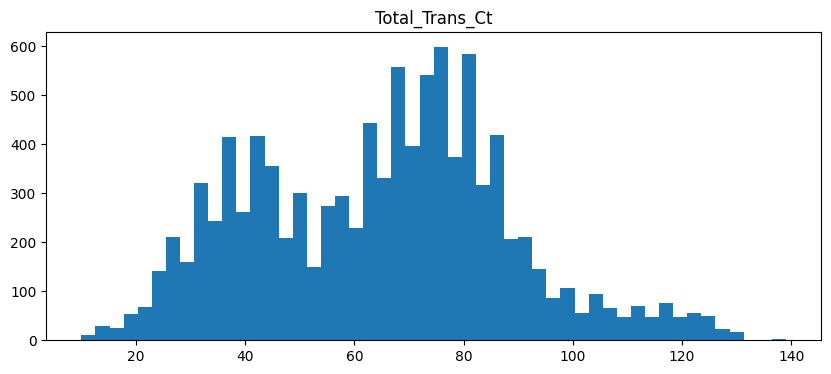

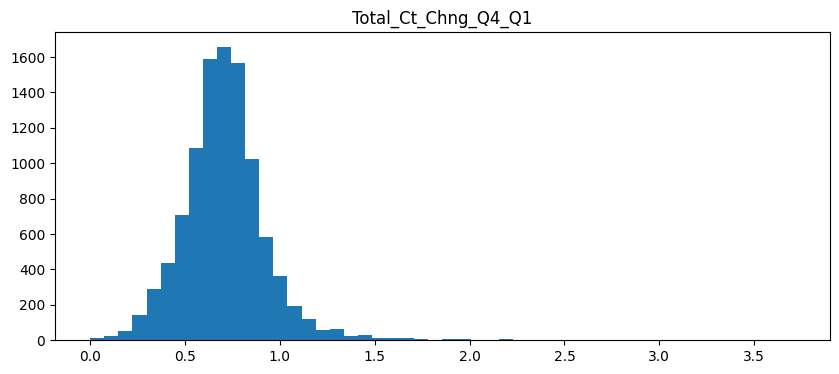

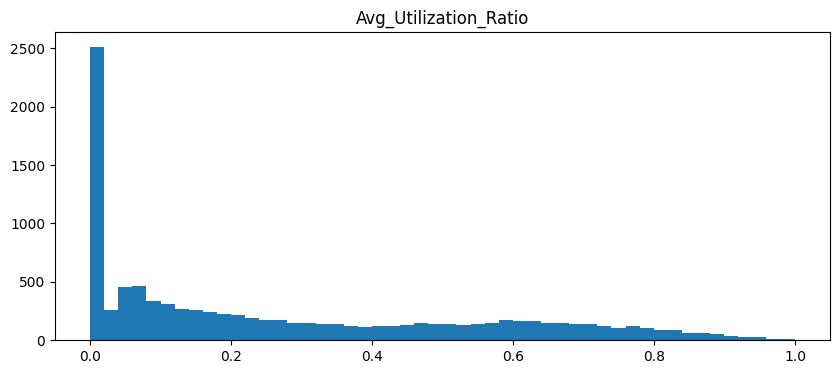

In [28]:
for column in ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
               'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']:
    plt.figure(figsize = (10, 4))
    plt.hist(df[column], bins = 50)
    plt.title(column)

## Credit_Limit

In [17]:
for df in [df]:
    df['Credit_Limit'] = df['Credit_Limit'].astype(float)
    df.loc[(df['Credit_Limit'] >=1438.3) & (df['Credit_Limit'] <= 2000), 'Credit_Limit'] =1
    df.loc[(df['Credit_Limit'] >2000) & (df['Credit_Limit'] <= 3000), 'Credit_Limit'] =2
    df.loc[(df['Credit_Limit'] >3000) & (df['Credit_Limit'] <= 4000), 'Credit_Limit'] =3
    df.loc[(df['Credit_Limit'] >4000) & (df['Credit_Limit'] <= 7000), 'Credit_Limit'] =4
    df.loc[(df['Credit_Limit'] >7000) & (df['Credit_Limit'] <= 10000), 'Credit_Limit'] =5
    df.loc[(df['Credit_Limit'] >10000) & (df['Credit_Limit'] <= 15000), 'Credit_Limit'] =6
    df.loc[(df['Credit_Limit'] >15000) & (df['Credit_Limit'] <= 20000), 'Credit_Limit'] =7
    df.loc[(df['Credit_Limit'] >20000) & (df['Credit_Limit'] <= 35000), 'Credit_Limit'] =8

<Axes: xlabel='Credit_Limit'>

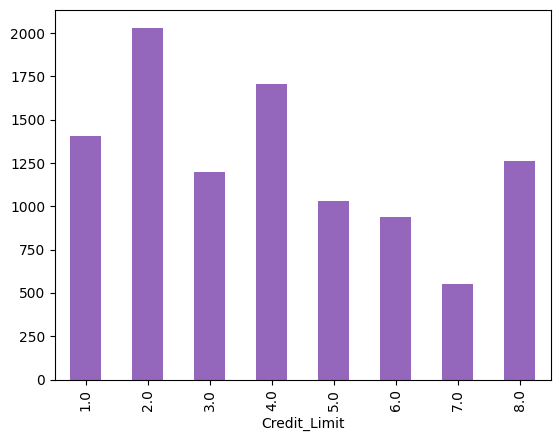

In [30]:
data_to_plot = df.groupby(['Credit_Limit'])['Credit_Limit'].count()
data_to_plot.plot.bar(width = 0.5, color = 'C4')

## Total_Revolving_Bal

In [18]:
for df in [df]:
    df['Total_Revolving_Bal'] = df['Total_Revolving_Bal'].astype(int)
    df.loc[(df['Total_Revolving_Bal'] <=100), 'Total_Revolving_Bal'] =1
    df.loc[(df['Total_Revolving_Bal'] >100) & (df['Total_Revolving_Bal'] <= 1000), 'Total_Revolving_Bal'] =2
    df.loc[(df['Total_Revolving_Bal'] >1000) & (df['Total_Revolving_Bal'] <= 1500), 'Total_Revolving_Bal'] =3
    df.loc[(df['Total_Revolving_Bal'] >1500) & (df['Total_Revolving_Bal'] <= 2000), 'Total_Revolving_Bal'] =4
    df.loc[(df['Total_Revolving_Bal'] >2000) & (df['Total_Revolving_Bal'] <= 2600), 'Total_Revolving_Bal'] =5

<Axes: xlabel='Total_Revolving_Bal'>

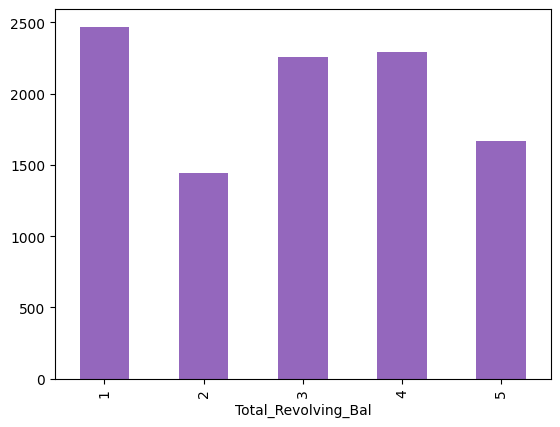

In [32]:
data_to_plot = df.groupby(['Total_Revolving_Bal'])['Total_Revolving_Bal'].count()
data_to_plot.plot.bar(width = 0.5, color = 'C4')

## Avg_Open_To_Buy

In [19]:
for df in [df]:
    df['Avg_Open_To_Buy'] = df['Avg_Open_To_Buy'].astype(int)
    df.loc[(df['Avg_Open_To_Buy'] <=1000), 'Avg_Open_To_Buy'] =1
    df.loc[(df['Avg_Open_To_Buy'] >1000) & (df['Avg_Open_To_Buy'] <= 3000), 'Avg_Open_To_Buy'] =2
    df.loc[(df['Avg_Open_To_Buy'] >3000) & (df['Avg_Open_To_Buy'] <= 7000), 'Avg_Open_To_Buy'] =3
    df.loc[(df['Avg_Open_To_Buy'] >7000) & (df['Avg_Open_To_Buy'] <= 15000), 'Avg_Open_To_Buy'] =4
    df.loc[(df['Avg_Open_To_Buy'] >15000) & (df['Avg_Open_To_Buy'] <= 35000), 'Avg_Open_To_Buy'] =5

<Axes: xlabel='Avg_Open_To_Buy'>

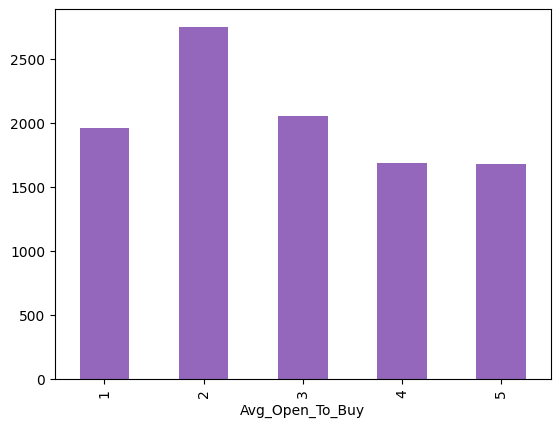

In [34]:
data_to_plot = df.groupby(['Avg_Open_To_Buy'])['Avg_Open_To_Buy'].count()
data_to_plot.plot.bar(width = 0.5, color = 'C4')

## Total_Amt_Chng_Q4_Q1

In [20]:
for dataset in [df]:
    dataset.loc[dataset['Total_Amt_Chng_Q4_Q1'] > 0.9, 'Total_Amt_Chng_Q4_Q1'] = 5
    dataset.loc[(dataset['Total_Amt_Chng_Q4_Q1'] > 0.5) & (dataset['Total_Amt_Chng_Q4_Q1'] <= 0.6), 'Total_Amt_Chng_Q4_Q1'] = 1
    dataset.loc[(dataset['Total_Amt_Chng_Q4_Q1'] > 0.6) & (dataset['Total_Amt_Chng_Q4_Q1'] <= 0.7), 'Total_Amt_Chng_Q4_Q1'] = 2
    dataset.loc[(dataset['Total_Amt_Chng_Q4_Q1'] > 0.7) & (dataset['Total_Amt_Chng_Q4_Q1'] <= 0.8), 'Total_Amt_Chng_Q4_Q1'] = 4
    dataset.loc[(dataset['Total_Amt_Chng_Q4_Q1'] > 0.8) & (dataset['Total_Amt_Chng_Q4_Q1'] <= 0.9), 'Total_Amt_Chng_Q4_Q1'] = 5
    dataset.loc[dataset['Total_Amt_Chng_Q4_Q1'] <= 0.5, 'Total_Amt_Chng_Q4_Q1'] = 0
df['Total_Amt_Chng_Q4_Q1'] = df['Total_Amt_Chng_Q4_Q1'].astype(int)

<Axes: xlabel='Total_Amt_Chng_Q4_Q1'>

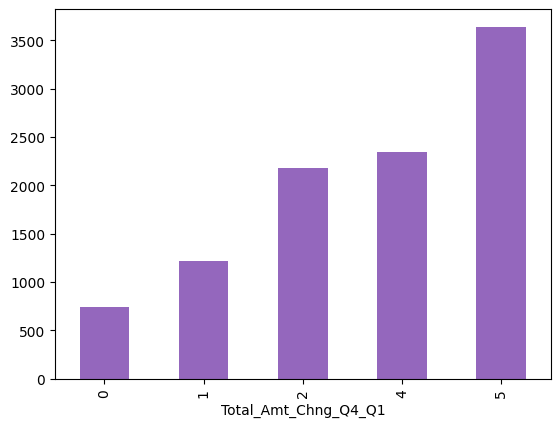

In [36]:
data_to_plot = df.groupby(['Total_Amt_Chng_Q4_Q1'])['Total_Amt_Chng_Q4_Q1'].count()
data_to_plot.plot.bar(width = 0.5, color = 'C4')

## Total_Trans_Amt

In [21]:
for df in [df]:
    df['Total_Trans_Amt'] = df['Total_Trans_Amt'].astype(int)
    df.loc[(df['Total_Trans_Amt'] >500) & (df['Total_Trans_Amt'] <= 2000), 'Total_Trans_Amt'] =1
    df.loc[(df['Total_Trans_Amt'] >2000) & (df['Total_Trans_Amt'] <= 3000), 'Total_Trans_Amt'] =2
    df.loc[(df['Total_Trans_Amt'] >3000) & (df['Total_Trans_Amt'] <= 4000), 'Total_Trans_Amt'] =3
    df.loc[(df['Total_Trans_Amt'] >4000) & (df['Total_Trans_Amt'] <= 5000), 'Total_Trans_Amt'] =4
    df.loc[(df['Total_Trans_Amt'] >5000) & (df['Total_Trans_Amt'] <= 19000), 'Total_Trans_Amt'] =5

<Axes: xlabel='Total_Trans_Amt'>

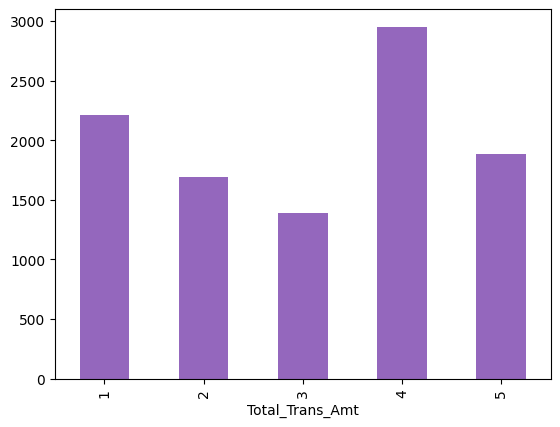

In [38]:
data_to_plot = df.groupby(['Total_Trans_Amt'])['Total_Trans_Amt'].count()
data_to_plot.plot.bar(width = 0.5, color = 'C4')

## Total_Trans_Ct

In [22]:
for df in [df]:
    df['Total_Trans_Ct'] = df['Total_Trans_Ct'].astype(int)
    df.loc[(df['Total_Trans_Ct'] >=10) & (df['Total_Trans_Ct'] <= 40), 'Total_Trans_Ct'] =1
    df.loc[(df['Total_Trans_Ct'] >40) & (df['Total_Trans_Ct'] <= 60), 'Total_Trans_Ct'] =2
    df.loc[(df['Total_Trans_Ct'] >60) & (df['Total_Trans_Ct'] <= 70), 'Total_Trans_Ct'] =3
    df.loc[(df['Total_Trans_Ct'] >70) & (df['Total_Trans_Ct'] <= 80), 'Total_Trans_Ct'] =4
    df.loc[(df['Total_Trans_Ct'] >80) & (df['Total_Trans_Ct'] <= 140), 'Total_Trans_Ct'] =5

<Axes: xlabel='Total_Trans_Ct'>

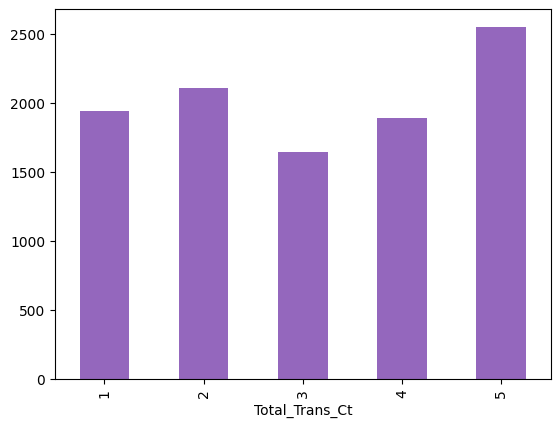

In [40]:
data_to_plot = df.groupby(['Total_Trans_Ct'])['Total_Trans_Ct'].count()
data_to_plot.plot.bar(width = 0.5, color = 'C4')

## Total_Ct_Chng_Q4_Q1

In [23]:
for dataset in [df]:
    dataset.loc[dataset['Total_Ct_Chng_Q4_Q1'] > 0.9, 'Total_Ct_Chng_Q4_Q1'] = 5
    dataset.loc[(dataset['Total_Ct_Chng_Q4_Q1'] > 0.5) & (dataset['Total_Ct_Chng_Q4_Q1'] <= 0.6), 'Total_Ct_Chng_Q4_Q1'] = 1
    dataset.loc[(dataset['Total_Ct_Chng_Q4_Q1'] > 0.6) & (dataset['Total_Ct_Chng_Q4_Q1'] <= 0.7), 'Total_Ct_Chng_Q4_Q1'] = 2
    dataset.loc[(dataset['Total_Ct_Chng_Q4_Q1'] > 0.7) & (dataset['Total_Ct_Chng_Q4_Q1'] <= 0.8), 'Total_Ct_Chng_Q4_Q1'] = 4
    dataset.loc[(dataset['Total_Ct_Chng_Q4_Q1'] > 0.8) & (dataset['Total_Ct_Chng_Q4_Q1'] <= 0.9), 'Total_Ct_Chng_Q4_Q1'] = 5
    dataset.loc[dataset['Total_Ct_Chng_Q4_Q1'] <= 0.5, 'Total_Ct_Chng_Q4_Q1'] = 0
df['Total_Ct_Chng_Q4_Q1'] = df['Total_Ct_Chng_Q4_Q1'].astype(int)

<Axes: xlabel='Total_Ct_Chng_Q4_Q1'>

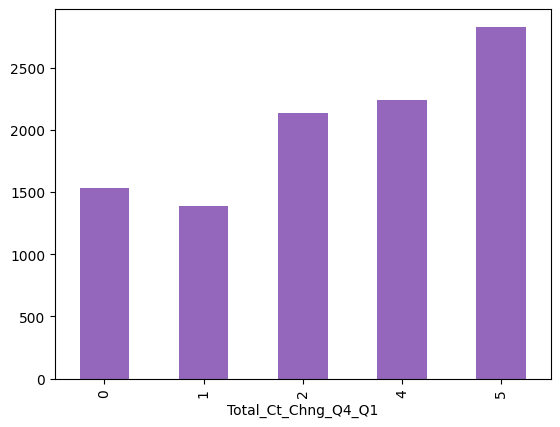

In [42]:
data_to_plot = df.groupby(['Total_Ct_Chng_Q4_Q1'])['Total_Ct_Chng_Q4_Q1'].count()
data_to_plot.plot.bar(width = 0.5, color = 'C4')

## Avg_Utilization_Ratio

In [24]:
for dataset in [df]:
    dataset.loc[dataset['Avg_Utilization_Ratio'] > 0.7, 'Avg_Utilization_Ratio'] = 4
    dataset.loc[(dataset['Avg_Utilization_Ratio'] > 0.05) & (dataset['Avg_Utilization_Ratio'] <= 0.2), 'Avg_Utilization_Ratio'] = 1
    dataset.loc[(dataset['Avg_Utilization_Ratio'] > 0.2) & (dataset['Avg_Utilization_Ratio'] <= 0.5), 'Avg_Utilization_Ratio'] = 2
    dataset.loc[(dataset['Avg_Utilization_Ratio'] > 0.5) & (dataset['Avg_Utilization_Ratio'] <= 0.7), 'Avg_Utilization_Ratio'] = 3
    dataset.loc[dataset['Avg_Utilization_Ratio'] <= 0.05, 'Avg_Utilization_Ratio'] = 0
df['Avg_Utilization_Ratio'] = df['Avg_Utilization_Ratio'].astype(int)

<Axes: xlabel='Avg_Utilization_Ratio'>

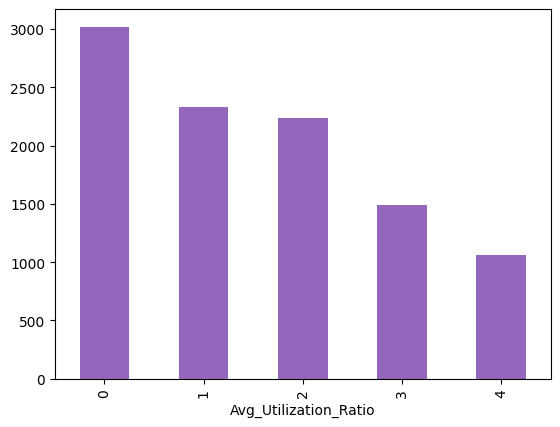

In [44]:
data_to_plot = df.groupby(['Avg_Utilization_Ratio'])['Avg_Utilization_Ratio'].count()
data_to_plot.plot.bar(width = 0.5, color = 'C4')

In [25]:
#Chuyển Male và Female về dạng 1,0
df.loc[df['Gender'] == 'F', 'Gender'] = 0
df.loc[df['Gender'] == 'M', 'Gender'] = 1

#Chuyển Blue và Not Blue về 0 và 1
df.loc[df['Card_Category'] == 'Blue', 'Card_Category'] = 0
df.loc[df['Card_Category'] == 'Not Blue', 'Card_Category'] = 1

df[['Gender', 'Card_Category', 'Attrition_Flag']] = df[['Gender', 'Card_Category', 'Attrition_Flag']].astype('int32')

# Chuyển các thuộc tính sau đây thành số
education_dict = {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6}
income_category_dict = {'Unknown' : 0, 'Less than $40K' : 1, '$40K - $60K' : 2, '$60K - $80K' : 3, '$80K - $120K' : 4, '$120K +' : 5}

df['Education_Level'] = df['Education_Level'].replace(education_dict)
df['Income_Category'] = df['Income_Category'].replace(income_category_dict)

#Chuyển các thuộc tính trong cột Marital_Status
marital = {'Unknown': 0, 'Married': 1, 'Single': 2, 'Divorced': 3}
df['Marital_Status'] = df['Marital_Status'].replace(marital)

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,2,1,3,2,1,3,0,3,5,1,3,6.0,2,4,5,1,2,5,1
1,1,3,0,5,4,2,1,0,3,6,1,2,5.0,2,4,5,1,1,5,1
2,1,4,1,3,4,1,4,0,2,4,1,0,3.0,1,3,5,1,1,5,0
3,1,1,0,4,2,0,1,0,1,3,4,1,3.0,5,1,5,1,1,5,4
4,1,1,1,3,1,1,3,0,1,5,1,0,4.0,1,3,5,1,1,5,0


In [26]:
correlation_matrix = df.corr()

In [27]:
sorted_indices = np.argsort(-correlation_matrix.abs().values, axis=1)
sorted_correlation_matrix = correlation_matrix.iloc[:, sorted_indices[0]]

In [28]:
# Reorder rows based on sorted indices
sorted_correlation_matrix = sorted_correlation_matrix.iloc[sorted_indices[0]]

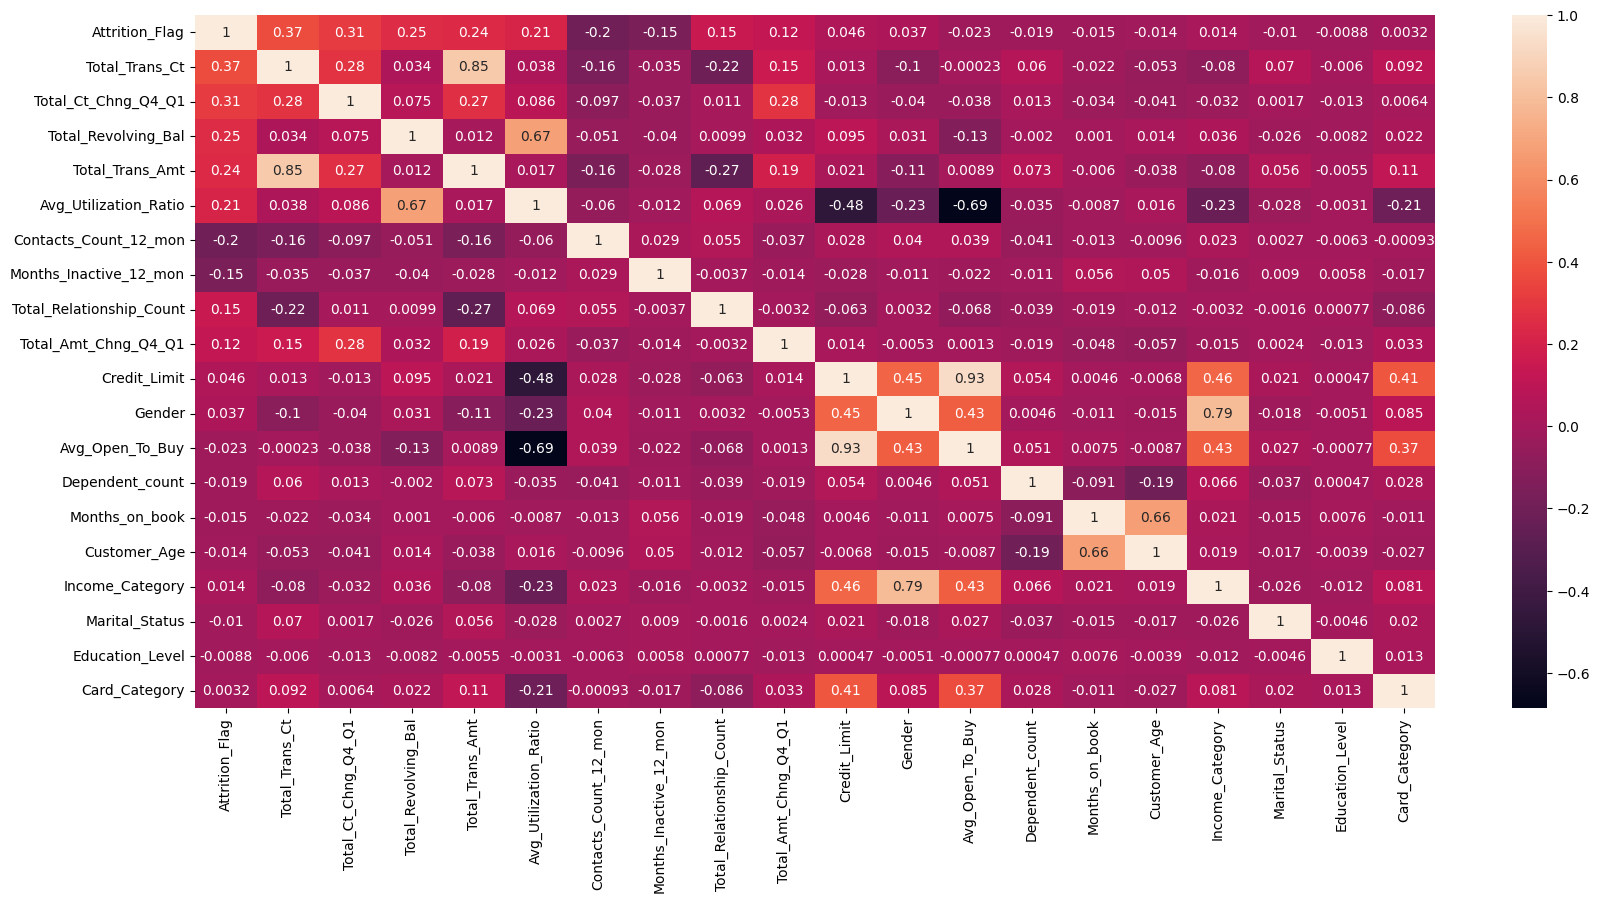

In [29]:
# Create heatmap
plt.figure(figsize=(20, 9))
sns.heatmap(sorted_correlation_matrix, annot=True)
plt.show()

Xóa đi 5 thuộc tính có độ tương quan thấp là: Card_Category, Education_Level, Marital_Status, Income_Category, Customer_Age

In [30]:
col_drop = ['Card_Category','Education_Level','Marital_Status','Income_Category','Customer_Age']

In [31]:
df = df.drop(columns=col_drop)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Gender                    10127 non-null  int32  
 2   Dependent_count           10127 non-null  int64  
 3   Months_on_book            10127 non-null  int32  
 4   Total_Relationship_Count  10127 non-null  int64  
 5   Months_Inactive_12_mon    10127 non-null  int64  
 6   Contacts_Count_12_mon     10127 non-null  int64  
 7   Credit_Limit              10127 non-null  float64
 8   Total_Revolving_Bal       10127 non-null  int32  
 9   Avg_Open_To_Buy           10127 non-null  int32  
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  int32  
 11  Total_Trans_Amt           10127 non-null  int32  
 12  Total_Trans_Ct            10127 non-null  int32  
 13  Total_Ct_Chng_Q4_Q1       10127 non-null  int32  
 14  Avg_Ut

In [33]:
df.shape

(10127, 15)

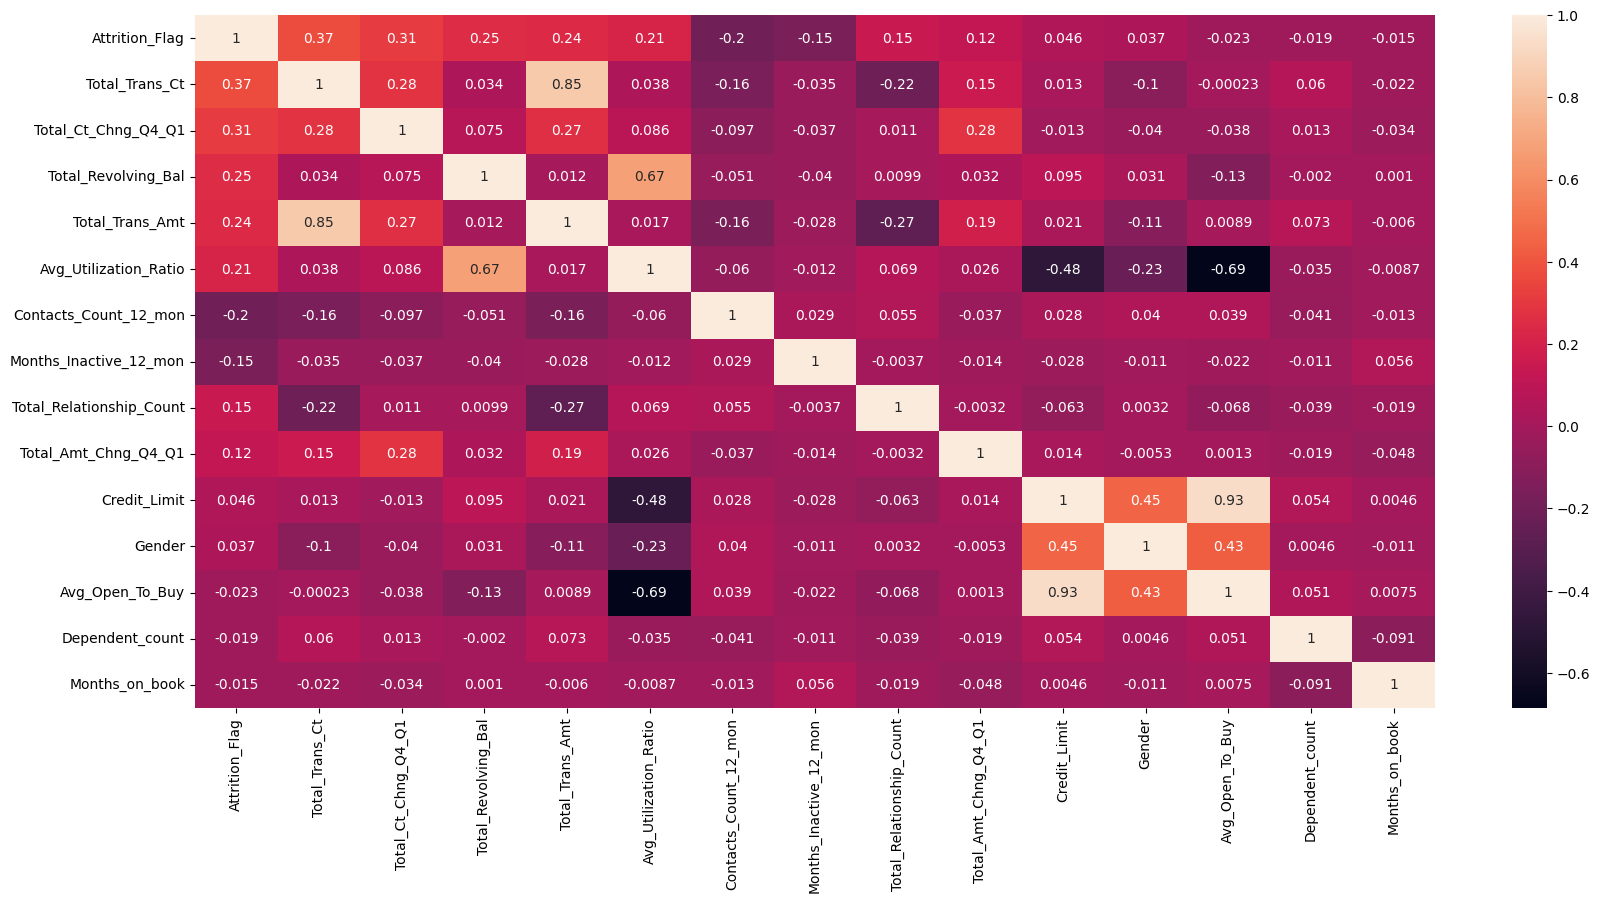

In [34]:
# Vẽ lại ma trận tương quan
correlation_matrix = df.corr()
sorted_indices = np.argsort(-correlation_matrix.abs().values, axis=1)
sorted_correlation_matrix = correlation_matrix.iloc[:, sorted_indices[0]]
sorted_correlation_matrix = sorted_correlation_matrix.iloc[sorted_indices[0]]
plt.figure(figsize=(20, 9))
sns.heatmap(sorted_correlation_matrix, annot=True)
plt.show()

In [54]:
# Xuất dữ liệu đã tiền xử lí thành 1 file csv mới
filename = 'BankChurners_Preprocessing.csv'
df.to_csv(filename, index=False)